In [1]:

from pymatgen.io.cif import CifParser
from pymatgen.core.structure import Structure
import numpy as np
from pymatgen.ext.matproj import MPRester


cif_parser = CifParser("4124511.cif")
structure = cif_parser.get_structures()[0]  


def estimate_density_empirical(structure):
    
    empirical_density = 0.1 * len(structure)  
    return empirical_density


def calculate_density_dft(structure):
    total_mass = np.sum([site.species.weight for site in structure])
    volume = structure.volume
    density = total_mass / volume
    return density


def calculate_density_packing(structure):
    volume = structure.volume
    packing_density = len(structure) / volume
    density = packing_density * sum([site.species.weight for site in structure])
    return density


def predict_density_ml(structure):
    ml_density = 0.05 * len(structure)  
    return ml_density


def get_density_from_mp(formula):
    api_key = 'aNUnHzxy70Ms9b7xKdMLPaqfHCkUl5UA'
    with MPRester(api_key) as mpr:
        entries = mpr.get_entries(formula)
        if not entries:
            raise ValueError(f"No data found for formula {formula}")
        for entry in entries:
            print(f"Formula: {entry.composition.reduced_formula}")
            print(f"Density: {entry.data.get('density', 'Density not available')} g/cm³")


empirical_density = estimate_density_empirical(structure)
dft_density = calculate_density_dft(structure)
packing_density = calculate_density_packing(structure)
ml_density = predict_density_ml(structure)
mp_density = get_density_from_mp(structure.composition.reduced_formula)  

print("Empirical Density:", empirical_density)
print("DFT Density:", dft_density)
print("Packing Density:", packing_density)
print("Machine Learning Density:", ml_density)
print("Materials Project Density:", mp_density)


FileNotFoundError: [Errno 2] No such file or directory: '4124511.cif'

In [ ]:
from ase.io import read


atoms = read("1540301.cif")


volume = atoms.get_volume()  
mass = atoms.get_masses().sum()  
density = (mass / 6.022e23) / (volume * 1e-24)  

print(f"Density: {density:.2f} g/cm³")

In [ ]:

from xiespp import CVR
from xiespp import formation_energy
from pymatgen.core import Structure


cif_file_path = "4124511.cif"  
structure = Structure.from_file(cif_file_path)


gen = formation_energy.prepare_data(
    data_input=[structure],  
    input_format='cif'  
)


model = formation_energy.FormationEnergyPredictor()


yp = model.predict(gen, return_all_ensembles=True)


print("Formation Energy Predictions:", yp)

In [ ]:
from pymatgen.ext.matproj import MPRester
import pandas as pd


API_KEY = "aNUnHzxy70Ms9b7xKdMLPaqfHCkUl5UA"
mpr = MPRester(API_KEY)


materials = ["Al2O3", "Ni", "SiO2", "Cu"]


material_data = []
for formula in materials:
    results = mpr.summary.search(formula=formula)  
    if results:  
        first_result = results[0]  
        material_data.append({
            "Formula": formula,
            "Formation_Energy (eV/atom)": first_result.formation_energy_per_atom,  
            "Density (g/cm³)": first_result.density  
        })

data = pd.DataFrame(material_data)


print(data)

In [ ]:
import pandas as pd


file_path = 'ml-dataset.xlsx'
data = pd.read_excel(file_path, sheet_name="Table")


column_name = 'Active component type'  
if column_name in data.columns:
    
    unique_count = data[column_name].nunique()
    print(f"Number of unique names in '{column_name}': {unique_count}")

    
    unique_names = data[column_name].unique()
    print("Unique names:")
    print(unique_names)
else:
    print(f"Error: Column '{column_name}' does not exist in the dataset.")


In [2]:
from pymatgen.ext.matproj import MPRester
import pandas as pd


API_KEY = "aNUnHzxy70Ms9b7xKdMLPaqfHCkUl5UA"
mpr = MPRester(API_KEY)


material_ids = [
    "mp-23",  
    "mp-27",  
    "mp-19009",  
    "mp-62",  
    "mp-1572",  
    "mp-13",  
    "mp-101",  
    "mp-134",  
    "mp-2652",  
    "mp-153",  
    "mp-58",  
    "mp-20194",  
    "mp-30",  
    "mp-78",  
    "mp-81",  
    "mp-131",  
    "mp-88",  
    "mp-23265",  
    "mp-136",  
    "mp-1176",  
    "mp-1518",  
    "mp-1538",  
    "mp-127",  
    "mp-60",  
    "mp-135",  
    "mp-1143",  
    "mp-87",  
    "mp-1540",  
    "mp-1520",  
    "mp-2657",  
    "mp-7000",  
    "mp-2858",  
    "mp-1265",  
    "mp-117",  
    "mp-19770",  
    "mp-19399",  
    "mp-19306",  
    "mp-18759",  
    "mp-2133",  
    "mp-540806",  
    "mp-19207",  
    "mp-540795",  
    "mp-540798"  
]



material_data = []
for material_id in material_ids:
    summary = mpr.summary.get_data_by_id(material_id)  
    if summary:  
        material_data.append({
            "Material_ID": material_id,
            "Formula": summary.formula_pretty,  
            "Formation_Energy (eV/atom)": summary.formation_energy_per_atom,  
            "Density (g/cm³)": summary.density  
        })


data = pd.DataFrame(material_data)


print(data)


C:\Users\pcu\AppData\Local\Temp\ipykernel_13384\3543608442.py:59: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  summary = mpr.summary.get_data_by_id(material_id)
C:\Users\pcu\AppData\Local\Temp\ipykernel_13384\3543608442.py:59: DeprecationWarning: get_data_by_id is deprecated and will be removed soon. Please use the search method instead.
  summary = mpr.summary.get_data_by_id(material_id)


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

   Material_ID     Formula  Formation_Energy (eV/atom)  Density (g/cm³)
0        mp-23          Ni                    0.000000         9.289220
1        mp-27          Si                    0.531566         3.342218
2     mp-19009         NiO                   -1.218085         6.762154
3        mp-62          Pa                    0.000000        15.684313
4      mp-1572        GaSe                   -0.689737         4.847688
5        mp-13          Fe                    0.000000         7.902858
6       mp-101          Ir                    0.000000        22.304354
7       mp-134          Al                    0.000000         2.720050
8      mp-2652        Y2O3                   -3.953872         5.026123
9       mp-153          Mg                    0.000000         1.801799
10       mp-58           K                    0.015214         0.826865
11    mp-20194        CeO2                   -3.927176         6.994759
12       mp-30          Cu                    0.000000         9

machine learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Try to read the CSV file with a common encoding
try:
    data = pd.read_csv('SI.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('SI.csv', encoding='ISO-8859-1')

# Convert 'Support b type density' to numeric without coercion
# data['Support b type density'] = pd.to_numeric(data['Support b type density'])

# Define feature set
X = data[
    [
        'Active component type',  
        'Active component type formation energy',
        'Active component type density',
        'Active component content (wt percent)',
        'Promoter type',
        'Promoter type formation energy',
        'Promoter type density',
        'Promoter content (wt percent)',
        'Support a type',
        'Support a type formation energy',
        'Support a type density',
        'Support a content (wt percent)',
        'Support b type',  
        'Support b type formation energy',
        'Support b type density',  
        'Preparation method',
        'Preparation Scalability',
        'Preparation cost',
        'Calcination Temperature (C)',
        'Calcination time (h)',
        'Reduction Temperature (C)',
        'Reduction Pressure (bar)',
        'Reduction time (h)',
        'Reduced hydrogen content (vol percent)',
        'Temperature (C)',
        'Pressure (bar)',
        'Weight hourly space velocity [mgcat/(min·ml)]',
        'Content of inert components in raw materials (vol percent)',
        'h2/co2 ratio (mol/mol)'
    ]
]

# Define target variables
ya = data['co2 conversion ratio (percent)']
yb = data['ch4 selectivity (percent)']
yc = data['ch4 yield (percent)']

# Display dataset information
print(X.head())  
print(X.info())  
print(X.describe())  


  Active component type  Active component type formation energy  \
0                    Ni                                   0.046   
1                    Ni                                   0.046   
2                    Ni                                   0.046   
3                    Ni                                   0.046   
4                    Ni                                   0.046   

   Active component type density  Active component content (wt percent)  \
0                           9.22                                    4.0   
1                           9.22                                   10.0   
2                           9.22                                   10.0   
3                           9.22                                   10.0   
4                           9.22                                   10.0   

  Promoter type  Promoter type formation energy  Promoter type density  \
0           NaN                             0.0                    0.0  

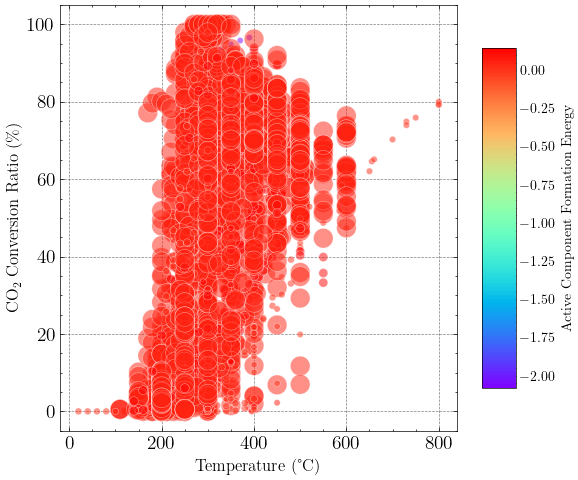

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scienceplots


plt.style.use(['science', 'grid'])  


unique_value_counts = data['Active component type formation energy'].value_counts()


data['Unique Count'] = data['Active component type formation energy'].map(unique_value_counts)


fig, ax = plt.subplots(figsize=(6, 5))


scatter_plot = sns.scatterplot(
    data=data,
    x='Temperature (C)',
    y='co2 conversion ratio (percent)',
    hue='Active component type formation energy',  
    size='Unique Count',  
    sizes=(20, 200),  
    palette='rainbow',  
    legend=False,  
    ax=ax,  
    alpha=0.5  
)


norm = plt.Normalize(vmin=data['Active component type formation energy'].min(), vmax=data['Active component type formation energy'].max())
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm.set_array([])  


cbar = plt.colorbar(sm, ax=ax, label='Active Component Formation Energy', shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=10)  


ax.set_xlabel(r'Temperature (°C)', fontsize=12, weight='bold')
ax.set_ylabel(r'CO$_2$ Conversion Ratio (\%)', fontsize=12, weight='bold')


ax.tick_params(axis='both')
#ax.text(-0.1, 1.05, "a)", transform=ax.transAxes, fontsize=18, weight='bold', va='top', ha='left')
ax.tick_params(axis='both', labelsize=14)  

plt.savefig("1.png", format='png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


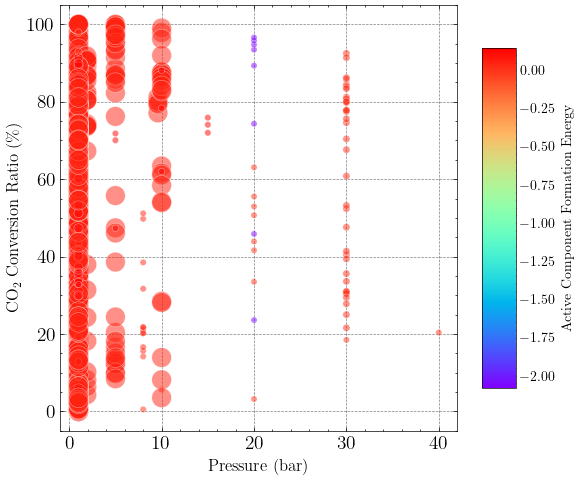

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scienceplots


plt.style.use(['science', 'grid'])  


unique_value_counts = data['Active component type formation energy'].value_counts()


data['Unique Count'] = data['Active component type formation energy'].map(unique_value_counts)


fig, ax = plt.subplots(figsize=(6, 5))


scatter_plot = sns.scatterplot(
    data=data,
    x='Pressure (bar)',
    y='co2 conversion ratio (percent)',
    hue='Active component type formation energy',  
    size='Unique Count',  
    sizes=(20, 200),  
    palette='rainbow',  
    legend=False,  
    ax=ax,  
    alpha=0.5  
)


norm = plt.Normalize(vmin=data['Active component type formation energy'].min(), vmax=data['Active component type formation energy'].max())
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm.set_array([])  


cbar = plt.colorbar(sm, ax=ax, label='Active Component Formation Energy', shrink=0.8, aspect=10)
cbar.ax.tick_params(labelsize=10)  


ax.set_xlabel(r'Pressure (bar)', fontsize=12, weight='bold')
ax.set_ylabel(r'CO$_2$ Conversion Ratio (\%)', fontsize=12, weight='bold')


ax.tick_params(axis='both')
#ax.text(-0.1, 1.05, "a)", transform=ax.transAxes, fontsize=18, weight='bold', va='top', ha='left')
ax.tick_params(axis='both', labelsize=14)  

plt.savefig("2.png", format='png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


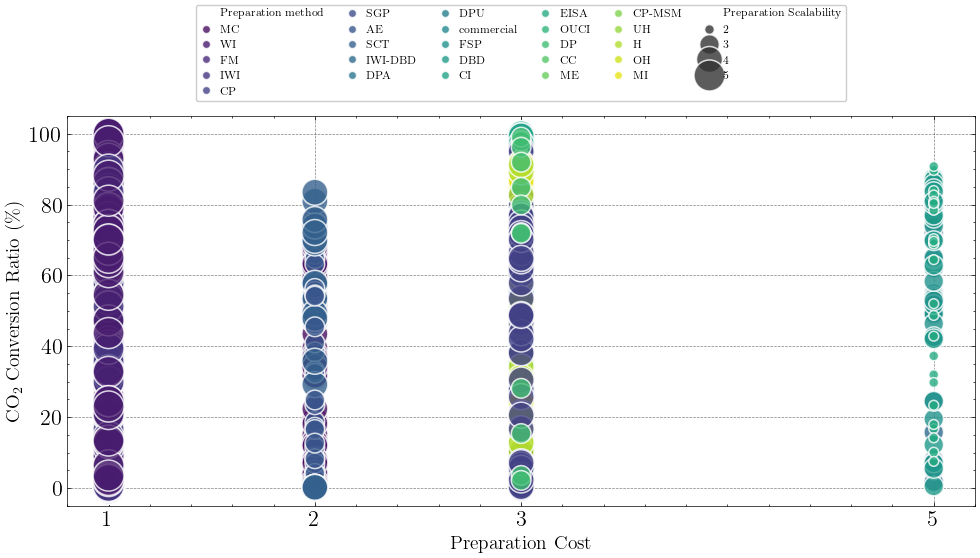

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


plot_data = data[['Preparation cost', 'Preparation Scalability', 'co2 conversion ratio (percent)', 'Preparation method']]


bubble_size = plot_data['Preparation Scalability']


plt.figure(figsize=(10, 6))  

sns.scatterplot(
    data=plot_data,
    x='Preparation cost',
    y='co2 conversion ratio (percent)',
    size=bubble_size,
    sizes=(50, 500),  
    hue='Preparation method',  
    palette='viridis',  
    alpha=0.8  
)


plt.xlabel("Preparation Cost", fontsize=14)
plt.ylabel(r'CO$_2$ Conversion Ratio (\%)', fontsize=14)


plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.3),  
    ncol=6,  
    frameon=True,
    handlelength=1,  
    fontsize=8  
)




plt.xticks(ticks=plot_data['Preparation cost'].unique(), fontsize=16, fontweight='bold')
plt.tick_params(axis='y', labelsize=16)  


plt.savefig("3.png", format='png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


machine learning

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Try to read the CSV file with a common encoding
try:
    data = pd.read_csv('SI.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('SI.csv', encoding='ISO-8859-1')

# Convert 'Support b type density' to numeric without coercion
# data['Support b type density'] = pd.to_numeric(data['Support b type density'])

# Define feature set
X = data[
    [
        'Active component type formation energy',
        'Active component type density',
        'Active component content (wt percent)',
        'Promoter type formation energy',
        'Promoter type density',
        'Promoter content (wt percent)',
        'Support a type formation energy',
        'Support a type density',
        'Support a content (wt percent)',
        'Support b type formation energy',
        'Support b type density',  
        'Calcination Temperature (C)',
        'Calcination time (h)',
        'Reduction Temperature (C)',
        'Reduction Pressure (bar)',
        'Reduction time (h)',
        'Reduced hydrogen content (vol percent)',
        'Temperature (C)',
        'Pressure (bar)',
        'Weight hourly space velocity [mgcat/(min·ml)]',
        'Content of inert components in raw materials (vol percent)',
        'h2/co2 ratio (mol/mol)'
    ]
]

# Define target variables
ya = data['co2 conversion ratio (percent)']
yb = data['ch4 selectivity (percent)']
yc = data['ch4 yield (percent)']

# Display dataset information
print(X.head())  
print(X.info())  
print(X.describe())  


   Active component type formation energy  Active component type density  \
0                                   0.046                           9.22   
1                                   0.046                           9.22   
2                                   0.046                           9.22   
3                                   0.046                           9.22   
4                                   0.046                           9.22   

   Active component content (wt percent)  Promoter type formation energy  \
0                                    4.0                             0.0   
1                                   10.0                             0.0   
2                                   10.0                             0.0   
3                                   10.0                             0.0   
4                                   10.0                             0.0   

   Promoter type density  Promoter content (wt percent)  \
0                    0.0   

In [49]:
# Enable experimental IterativeImputer
from sklearn.experimental import enable_iterative_imputer

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import joblib
import os

# Load and clean data
X = pd.DataFrame(X).replace(['?', 'NA', 'nan'], np.nan)
X = X.apply(pd.to_numeric, errors='coerce')

target_vars = ['co2 conversion ratio', 'ch4 selectivity (percent)', 'ch4 yield (percent)']
target_data = [ya, yb, yc]

# Create a directory to store saved models
os.makedirs('saved_models', exist_ok=True)

# Store results for all targets
results = {}

# Iterate through each target variable
for target_name, y in zip(target_vars, target_data):
    print(f"Evaluating models for {target_name}...")

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Impute missing values
    imputer = IterativeImputer(random_state=42)
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Save imputer
    joblib.dump(imputer, f'saved_models/{target_name}_imputer.pkl')

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # Save scaler
    joblib.dump(scaler, f'saved_models/{target_name}_scaler.pkl')

    # Store model results for the current target
    model_results = {}

    # Helper function for model evaluation and saving
    def evaluate_model(model, model_name, save_path):
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        model_results[model_name] = {
            'MSE': mean_squared_error(y_test, y_pred),
            'R²': r2_score(y_test, y_pred)
        }
        joblib.dump(model, save_path)  # Save model
        print(f"{model_name} saved for {target_name}.")

    # ----------------- Random Forest with Hyperparameter Tuning -----------------
    rf_param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf_model = RandomizedSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_distributions=rf_param_grid,
        n_iter=20, cv=5, verbose=0, n_jobs=-1
    )
    evaluate_model(rf_model, 'Random Forest', f'saved_models/{target_name}_rf.pkl')

    # ----------------- TensorFlow Neural Network -----------------
    tf_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1)
    ])

    tf_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    tf_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                 epochs=400, batch_size=32, verbose=0, callbacks=[early_stopping])

    y_pred_tf = tf_model.predict(X_test_scaled).flatten()
    model_results['TensorFlow Neural Network'] = {
        'MSE': mean_squared_error(y_test, y_pred_tf),
        'R²': r2_score(y_test, y_pred_tf)
    }

    # Save TensorFlow model
    tf_model.save(f'saved_models/{target_name}_tf_model.h5')
    print(f"TensorFlow model saved for {target_name}.")

    # ----------------- Ridge & Lasso Regression -----------------
    evaluate_model(Ridge(alpha=1.0), 'Ridge Regression', f'saved_models/{target_name}_ridge.pkl')
    evaluate_model(Lasso(alpha=0.01), 'Lasso Regression', f'saved_models/{target_name}_lasso.pkl')

    # ----------------- MLP Neural Network -----------------
    evaluate_model(MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42),
                   'MLP Neural Network', f'saved_models/{target_name}_mlp.pkl')

    # ----------------- XGBoost with Hyperparameter Tuning -----------------
    xgb_param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    xgb_model = RandomizedSearchCV(
        estimator=XGBRegressor(random_state=42, objective='reg:squarederror'),
        param_distributions=xgb_param_grid,
        n_iter=20, cv=5, verbose=0, n_jobs=-1
    )
    evaluate_model(xgb_model, 'XGBoost', f'saved_models/{target_name}_xgb.pkl')

    # ----------------- Stacking Model (Ensemble) -----------------
    stack_model = StackingRegressor(
        estimators=[
            ('rf', RandomForestRegressor(n_estimators=300, random_state=42)),
            ('xgb', XGBRegressor(n_estimators=300, random_state=42, objective='reg:squarederror'))
        ],
        final_estimator=LinearRegression()
    )
    evaluate_model(stack_model, 'Stacking Ensemble', f'saved_models/{target_name}_stack.pkl')

    # ----------------- Cross-Validation Score -----------------
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_model.best_estimator_, X_train_scaled, y_train, cv=kfold, scoring='r2')

    model_results['Cross-Validation R²'] = {
        'Mean R²': np.mean(cv_scores),
        'Std Dev': np.std(cv_scores)
    }

    # Store results for the target variable
    results[target_name] = model_results

# Print results
for target_name, model_results in results.items():
    print(f"\nResults for {target_name}:")
    for model_name, metrics in model_results.items():
        print(f"{model_name}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")
        print("-" * 50)

Evaluating models for co2 conversion ratio...
Random Forest saved for co2 conversion ratio.


c:\Users\pcu\Desktop\pcuenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


TensorFlow model saved for co2 conversion ratio.
Ridge Regression saved for co2 conversion ratio.
Lasso Regression saved for co2 conversion ratio.
MLP Neural Network saved for co2 conversion ratio.
XGBoost saved for co2 conversion ratio.
Stacking Ensemble saved for co2 conversion ratio.
Evaluating models for ch4 selectivity (percent)...
Random Forest saved for ch4 selectivity (percent).


c:\Users\pcu\Desktop\pcuenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


TensorFlow model saved for ch4 selectivity (percent).
Ridge Regression saved for ch4 selectivity (percent).
Lasso Regression saved for ch4 selectivity (percent).
MLP Neural Network saved for ch4 selectivity (percent).
XGBoost saved for ch4 selectivity (percent).
Stacking Ensemble saved for ch4 selectivity (percent).
Evaluating models for ch4 yield (percent)...
Random Forest saved for ch4 yield (percent).


c:\Users\pcu\Desktop\pcuenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


TensorFlow model saved for ch4 yield (percent).
Ridge Regression saved for ch4 yield (percent).
Lasso Regression saved for ch4 yield (percent).
MLP Neural Network saved for ch4 yield (percent).
XGBoost saved for ch4 yield (percent).
Stacking Ensemble saved for ch4 yield (percent).

Results for co2 conversion ratio:
Random Forest:
  MSE: 124.0614
  R²: 0.8688
--------------------------------------------------
TensorFlow Neural Network:
  MSE: 104.2400
  R²: 0.8898
--------------------------------------------------
Ridge Regression:
  MSE: 508.6355
  R²: 0.4622
--------------------------------------------------
Lasso Regression:
  MSE: 508.5185
  R²: 0.4623
--------------------------------------------------
MLP Neural Network:
  MSE: 85.1859
  R²: 0.9099
--------------------------------------------------
XGBoost:
  MSE: 83.7885
  R²: 0.9114
--------------------------------------------------
Stacking Ensemble:
  MSE: 72.6176
  R²: 0.9232
--------------------------------------------------


In [45]:
import joblib

# Load the model using joblib
model_path = os.path.join('saved_models', 'co2 conversion ratio_mlp.pkl')
mlp_model = joblib.load(model_path)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [48]:
import joblib
import pandas as pd

# Load the saved model and scaler using joblib
model_path = 'saved_models\\co2 conversion ratio_mlp.pkl'
scaler_path = 'saved_models\\co2 conversion ratio_scaler.pkl'

# Load MLP model and scaler
mlp_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Define the input data based on the provided values
user_input = {
    'Active component type formation energy': 0.046,
    'Active component type density': 9.22,
    'Active component content (wt percent)': 4,
    'Promoter type formation energy': 0,
    'Promoter type density': 0,
    'Promoter content (wt percent)': 0,
    'Support a type formation energy': -3.352,
    'Support a type density': 3.87,
    'Support a content (wt percent)': 90,
    'Support b type formation energy': 0,
    'Support b type density': 0,
    'Calcination Temperature (C)': 500,
    'Calcination time (h)': 3,
    'Reduction Temperature (C)': 500,
    'Reduction Pressure (bar)': 1,
    'Reduction time (h)': 2,
    'Reduced hydrogen content (vol percent)': 100,
    'Temperature (C)': 200,
    'Pressure (bar)': 1,
    'Weight hourly space velocity [mgcat/(min·ml)]': 6.67,
    'Content of inert components in raw materials (vol percent)': 0,
    'h2/co2 ratio (mol/mol)': 4
}

# Convert user input into a DataFrame
user_input_df = pd.DataFrame([user_input])

# Feature names should be in the same order as the model expects
feature_order = [
    'Active component type formation energy',
    'Active component type density',
    'Active component content (wt percent)',
    'Promoter type formation energy',
    'Promoter type density',
    'Promoter content (wt percent)',
    'Support a type formation energy',
    'Support a type density',
    'Support a content (wt percent)',
    'Support b type formation energy',
    'Support b type density',
    'Calcination Temperature (C)',
    'Calcination time (h)',
    'Reduction Temperature (C)',
    'Reduction Pressure (bar)',
    'Reduction time (h)',
    'Reduced hydrogen content (vol percent)',
    'Temperature (C)',
    'Pressure (bar)',
    'Weight hourly space velocity [mgcat/(min·ml)]',
    'Content of inert components in raw materials (vol percent)',
    'h2/co2 ratio (mol/mol)'
]

# Ensure the input DataFrame has the correct order of features
user_input_df = user_input_df[feature_order]

# Apply scaling to the input data (the model was trained with scaled data)
user_input_scaled = scaler.transform(user_input_df.values)

# Predict CO2 conversion ratio using the loaded MLP model
co2_conversion_prediction = mlp_model.predict(user_input_scaled)

print(f"Predicted CO2 Conversion Ratio: {co2_conversion_prediction[0]:.2f} %")




Predicted CO2 Conversion Ratio: 1.76 %


Index(['ACTFE', 'ACTD', 'ACW', 'PTFE', 'PTD', 'PTW', 'SATFE', 'SATD', 'SAW',
       'SBFE', 'SBTD', 'CTC', 'CTH', 'RTC', 'RPB', 'RTH', 'RHC', 'T', 'P',
       'WHSV', 'CIRMW', 'H$_2$/CO$_2$'],
      dtype='object')
CO2_CR CH4_S CH4_Y


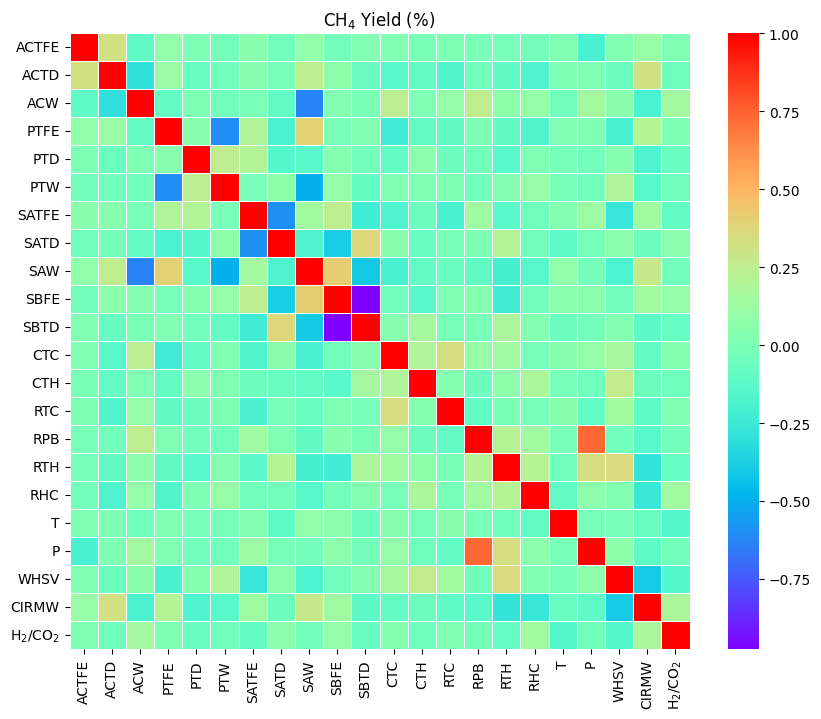

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Try to read the CSV file with a common encoding
try:
    data = pd.read_csv('SI.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('SI.csv', encoding='ISO-8859-1')

# Define feature set
X = data[
    [
        'Active component type formation energy',
        'Active component type density',
        'Active component content (wt percent)',
        'Promoter type formation energy',
        'Promoter type density',
        'Promoter content (wt percent)',
        'Support a type formation energy',
        'Support a type density',
        'Support a content (wt percent)',
        'Support b type formation energy',
        'Support b type density',  
        'Calcination Temperature (C)',
        'Calcination time (h)',
        'Reduction Temperature (C)',
        'Reduction Pressure (bar)',
        'Reduction time (h)',
        'Reduced hydrogen content (vol percent)',
        'Temperature (C)',
        'Pressure (bar)',
        'Weight hourly space velocity [mgcat/(min·ml)]',
        'Content of inert components in raw materials (vol percent)',
        'h2/co2 ratio (mol/mol)'
    ]
]

X = pd.DataFrame(X).replace(['?', 'NA', 'nan'], np.nan)
X = X.apply(pd.to_numeric, errors='coerce')

# Abbreviations for feature columns
abbreviations = {
    'Active component type density': 'ACTD',
    'Active component type formation energy': 'ACTFE',
    'Active component content (wt percent)': 'ACW',
    'Promoter type density': 'PTD',
    'Promoter type formation energy': 'PTFE',
    'Promoter content (wt percent)': 'PTW',
    'Support a type density': 'SATD',
    'Support a type formation energy': 'SATFE',
    'Support a content (wt percent)': 'SAW',
    'Support b type density': 'SBTD',
    'Support b type formation energy': 'SBFE',
    'Support b content (wt percent)': 'SBW',
    'Calcination Temperature (C)': 'CTC',
    'Calcination time (h)': 'CTH',
    'Reduction Temperature (C)': 'RTC',
    'Reduction Pressure (bar)': 'RPB',
    'Reduction time (h)': 'RTH',
    'Reduced hydrogen content (vol percent)': 'RHC',
    'Temperature (C)': 'T',
    'Pressure (bar)': 'P',
    'Weight hourly space velocity [mgcat/(min·ml)]': 'WHSV',
    'Content of inert components in raw materials (vol percent)': 'CIRMW',
    'h2/co2 ratio (mol/mol)': 'H$_2$/CO$_2$'
}

X.columns = [abbreviations.get(col, col) for col in X.columns]

# Targets
ya = data['co2 conversion ratio (percent)']
yb = data['ch4 selectivity (percent)']
yc = data['ch4 yield (percent)']

target_abbr = {
    'co2 conversion ratio (percent)': 'CO2_CR',
    'ch4 selectivity (percent)': 'CH4_S',
    'ch4 yield (percent)': 'CH4_Y'
}

ya.name = target_abbr.get(ya.name, ya.name)
yb.name = target_abbr.get(yb.name, yb.name)
yc.name = target_abbr.get(yc.name, yc.name)

print(X.columns)
print(ya.name, yb.name, yc.name)

# Use 'ya' (CO2 conversion ratio) as the target
y = ya

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create correlation matrix and improved heatmap
# Create the correlation matrix
corrmat = X_train.corr()

# Create the heatmap without numeric labels
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corrmat, cmap="rainbow", annot=False, linewidths=0.5, ax=ax)

plt.title(r'CH$_4$ Yield (%)')
plt.savefig("heat.png", format='png', dpi=600, bbox_inches='tight')
plt.show()


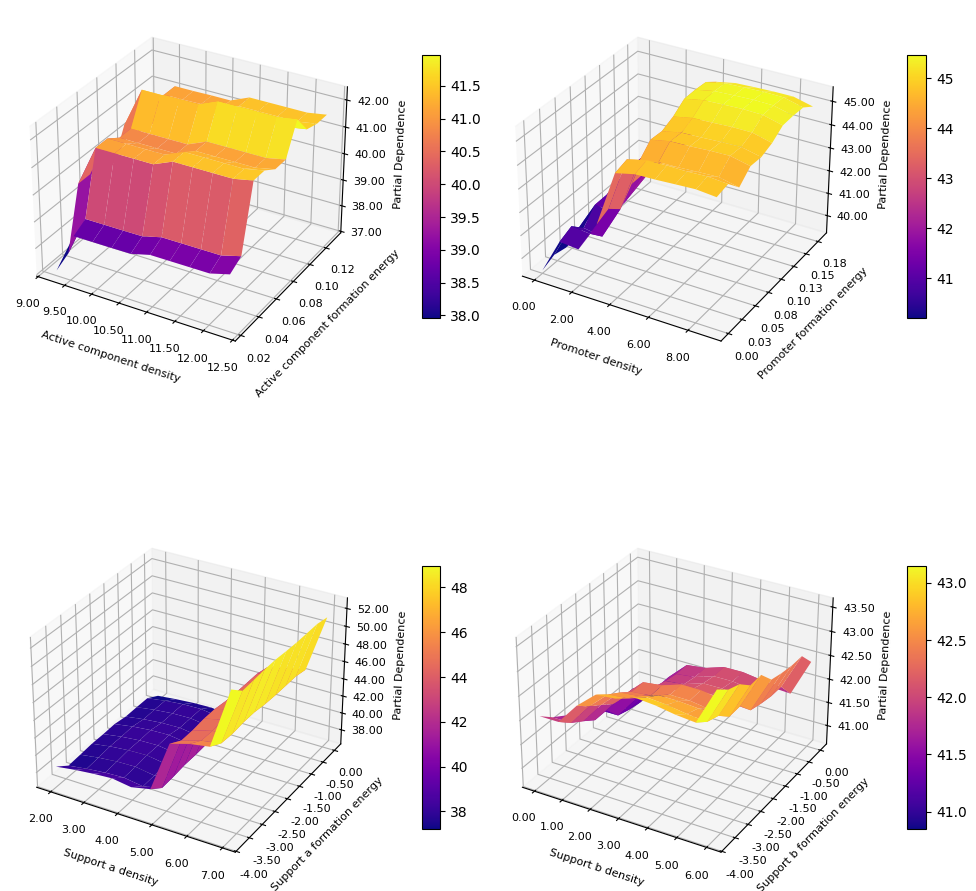

<Figure size 640x480 with 0 Axes>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import partial_dependence
from matplotlib.ticker import FuncFormatter
from sklearn.neural_network import MLPRegressor

# Features and targets
X = data[
    [
        'Active component type formation energy',
        'Active component type density',
        'Active component content (wt percent)',
        'Promoter type formation energy',
        'Promoter type density',
        'Promoter content (wt percent)',
        'Support a type formation energy',
        'Support a type density',
        'Support a content (wt percent)',
        'Support b type formation energy',
        'Support b type density',  
        'Calcination Temperature (C)',
        'Calcination time (h)',
        'Reduction Temperature (C)',
        'Reduction Pressure (bar)',
        'Reduction time (h)',
        'Reduced hydrogen content (vol percent)',
        'Temperature (C)',
        'Pressure (bar)',
        'Weight hourly space velocity [mgcat/(min·ml)]',
        'Content of inert components in raw materials (vol percent)',
        'h2/co2 ratio (mol/mol)'
    ]
]
ya = data['ch4 yield (percent)']

X = pd.DataFrame(X).replace(['?', 'NA', 'nan'], np.nan)
X = X.apply(pd.to_numeric, errors='coerce')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size=0.2, random_state=42)

# Impute missing values (mean imputation)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train RandomForest model
mlp_model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_imputed, y_train)

feature_sets = [
    ('Active component type density', 'Active component type formation energy'),
    ('Promoter type density', 'Promoter type formation energy'),
    ('Support a type density', 'Support a type formation energy'),
    ('Support b type density', 'Support b type formation energy')
]

# Helper function to clean feature names
def clean_feature_name(name):
    return name.replace(' type', '')

# Create the 3D plots
fig = plt.figure(figsize=(10, 12))

for i, (feature_1, feature_2) in enumerate(feature_sets):
    feature_1_idx = X.columns.get_loc(feature_1)
    feature_2_idx = X.columns.get_loc(feature_2)

    # Compute partial dependence
    pdp_result = partial_dependence(
        rf_model, X_train_imputed, features=[feature_1_idx, feature_2_idx], kind="average", grid_resolution=10
    )

    XX, YY = np.meshgrid(pdp_result["grid_values"][0], pdp_result["grid_values"][1])
    Z = pdp_result["average"][0].T  

    # Create subplot
    ax = fig.add_subplot(2, 2, i+1, projection='3d')

    # Use 'plasma' colormap
    surf = ax.plot_surface(XX, YY, Z, cmap='plasma', edgecolor='none')

    # Set labels with cleaner names
    ax.set_xlabel(clean_feature_name(feature_1), fontsize=8)
    ax.set_ylabel(clean_feature_name(feature_2), fontsize=8)
    ax.set_zlabel("Partial Dependence", fontsize=8)

    # Format axis labels
    formatter = FuncFormatter(lambda x, _: f'{x:.2f}')  
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    ax.zaxis.set_major_formatter(formatter)

    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.tick_params(axis='z', which='major', labelsize=8)

    # Adjust color bar size
    fig.colorbar(surf, ax=ax, shrink=0.4, aspect=14, pad=0.12)

plt.tight_layout()
plt.show()
plt.savefig("pdp_plots.png", format='png', dpi=600)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap
import matplotlib.pyplot as plt



X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


results = {}


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)
y_pred_rf = rf_model.predict(X_test_imputed)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R²': r2_score(y_test, y_pred_rf)
}


rf_explainer = shap.Explainer(rf_model, X_train_imputed)
shap_values_rf = rf_explainer(X_test_imputed)


shap.summary_plot(shap_values_rf, features=X_test_imputed, feature_names=X.columns)


tf_model = Sequential([
    Dense(64, input_dim=X_train_imputed.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  
])
tf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
tf_model.fit(X_train_imputed, y_train, validation_data=(X_test_imputed, y_test), epochs=600, batch_size=32, verbose=0)
loss, mae = tf_model.evaluate(X_test_imputed, y_test, verbose=0)
y_pred_tf = tf_model.predict(X_test_imputed).flatten()
results['TensorFlow Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_tf),
    'R²': r2_score(y_test, y_pred_tf)
}


tf_explainer = shap.DeepExplainer(tf_model, X_train_imputed)
shap_values_tf = tf_explainer.shap_values(X_test_imputed)


shap.summary_plot(shap_values_tf, features=X_test_imputed, feature_names=X.columns)


lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)
y_pred_lr = lr_model.predict(X_test_imputed)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R²': r2_score(y_test, y_pred_lr)
}


lr_explainer = shap.Explainer(lr_model, X_train_imputed)
shap_values_lr = lr_explainer(X_test_imputed)


shap.summary_plot(shap_values_lr, features=X_test_imputed, feature_names=X.columns)


xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train_imputed, y_train)
y_pred_xgb = xgb_model.predict(X_test_imputed)
results['XGBoost'] = {
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'R²': r2_score(y_test, y_pred_xgb)
}


xgb_explainer = shap.Explainer(xgb_model, X_train_imputed)
shap_values_xgb = xgb_explainer(X_test_imputed)


shap.summary_plot(shap_values_xgb, features=X_test_imputed, feature_names=X.columns)


for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  R-squared (R²): {metrics['R²']}")
    print("-" * 50)


In [21]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import partial_dependence


data = pd.read_excel('ml-dataset.xlsx', sheet_name="Table")
data['Support b type formation energy'] = pd.to_numeric(data['Support b type formation energy'], errors='coerce')


X = data[['Active component type density', 
          'Active component type formation energy', 
          'Active component content (wt%)', 
          'Promoter type density', 
          'Promoter type formation energy', 
          'Promoter content (wt%)', 
          'Support a type density', 
          'Support a type formation energy', 
          'Support a content (wt%)', 
          'Support b type density', 
          'Support b type formation energy', 
          'Preparation Scalability', 
          'Preparation cost', 
          'Calcination Temperature (℃)', 
          'Calcination time (h)', 
          'Reduction Temperature (℃)', 
          'Reduction Pressure (bar)', 
          'Reduction time  (h)', 
          'Reduced hydrogen content (vol%)', 
          'Temperature (℃)', 
          'Pressure (bar)', 
          'Weight hourly space velocity [mgcat/(min·ml)]', 
          'Content of inert components in raw materials (vol%)']]
ya = data['H2CO2 ratio (molmol)']


X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)


feature_1 = 'Promoter type density'
feature_2 = 'Promoter type formation energy'
feature_1_idx = X.columns.get_loc(feature_1)
feature_2_idx = X.columns.get_loc(feature_2)


pdp_result = partial_dependence(
    rf_model, X_train_imputed, features=[feature_1_idx, feature_2_idx], kind="average", grid_resolution=10
)


XX, YY = np.meshgrid(pdp_result["grid_values"][0], pdp_result["grid_values"][1])
Z = pdp_result["average"][0].T  


fig = go.Figure(data=[go.Surface(
    z=Z, 
    x=XX, 
    y=YY,
    colorscale='RdBu',  
    colorbar=dict(title="Partial Dependence")
)])


fig.update_layout(
    scene=dict(
        xaxis_title=feature_1,
        yaxis_title=feature_2,
        zaxis_title="Partial Dependence",
    ),
    title="3D Partial Dependence Plot",
    title_x=0.5,
    title_y=0.95,
    title_font=dict(size=16, color='black', family='Arial'),
)


fig.show()


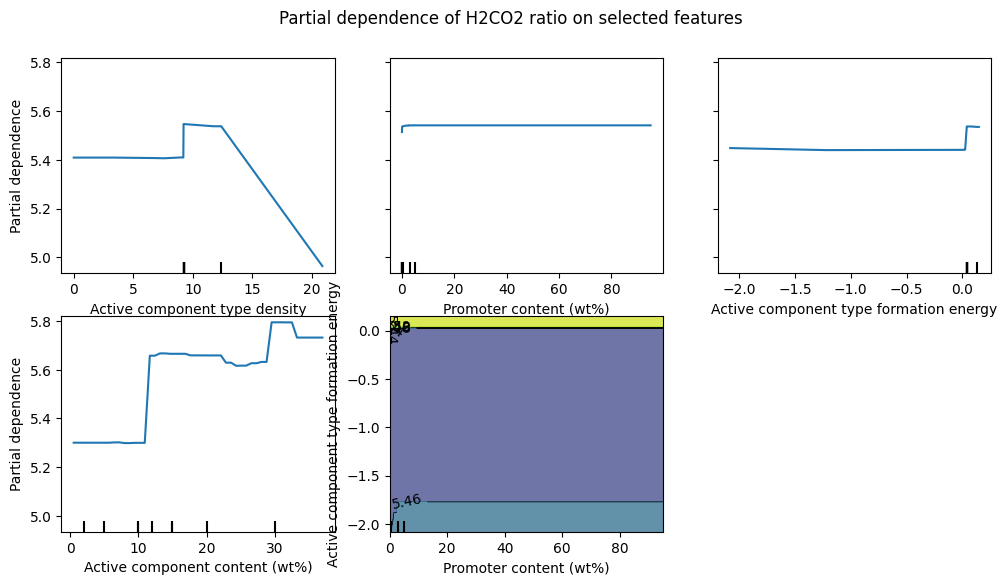

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay


data = pd.read_excel('ml-dataset.xlsx', sheet_name="Table")
data['Support b type formation energy'] = pd.to_numeric(data['Support b type formation energy'], errors='coerce')


X = data[['Active component type density', 
          'Active component type formation energy', 
          'Active component content (wt%)', 
          'Promoter type density', 
          'Promoter type formation energy', 
          'Promoter content (wt%)', 
          'Support a type density', 
          'Support a type formation energy', 
          'Support a content (wt%)', 
          'Support b type density', 
          'Support b type formation energy', 
          'Preparation Scalability', 
          'Preparation cost', 
          'Calcination Temperature (℃)', 
          'Calcination time (h)', 
          'Reduction Temperature (℃)', 
          'Reduction Pressure (bar)', 
          'Reduction time  (h)', 
          'Reduced hydrogen content (vol%)', 
          'Temperature (℃)', 
          'Pressure (bar)', 
          'Weight hourly space velocity [mgcat/(min·ml)]', 
          'Content of inert components in raw materials (vol%)']]
ya = data['H2CO2 ratio (molmol)']
yb = data['CO2 conversion ratio(%)']
yc = data['CH4 selectivity (%)']
yd = data['CH4 yield(%)']


X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size=0.2, random_state=42)


clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


features = [0, 5, 1, 2, (5, 1)]  
fig, ax = plt.subplots(figsize=(12, 6))
disp = PartialDependenceDisplay.from_estimator(clf, X_train, features=features,
                                               feature_names=X.columns, ax=ax,
                                               grid_resolution=50)


plt.suptitle('Partial dependence of H2CO2 ratio on selected features')
plt.subplots_adjust(top=0.9)  

plt.show()


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	10
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	10
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	10
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	10
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	8
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	12
Tentative: 	7
Rejected: 	4
I

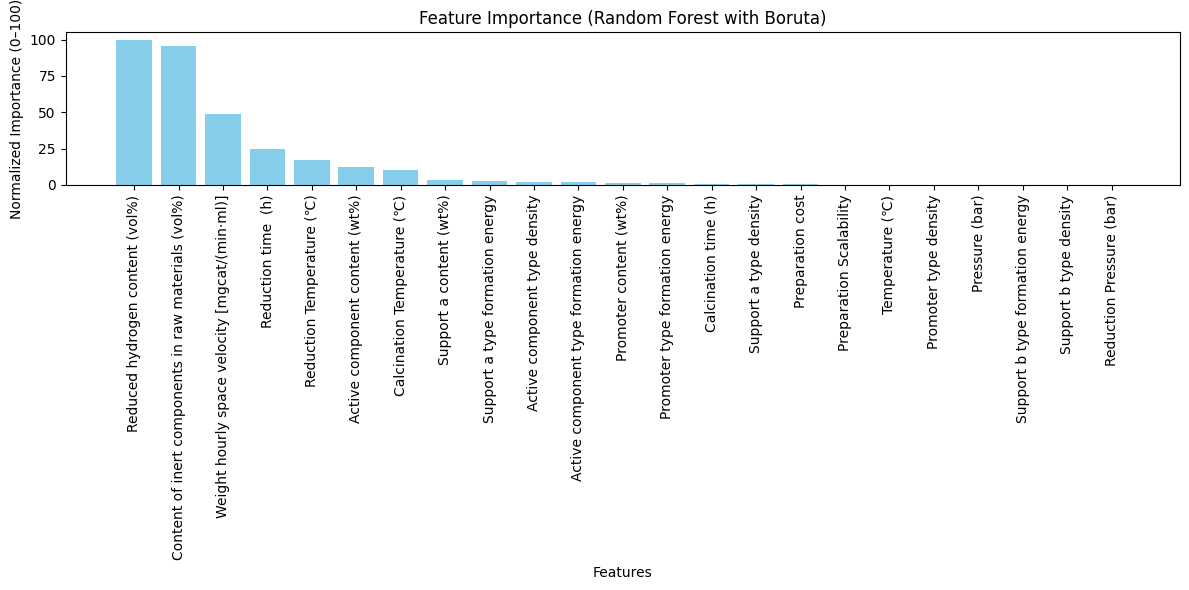

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


rf_model = RandomForestRegressor(random_state=42)  
boruta_selector = BorutaPy(rf_model, n_estimators='auto', random_state=42, verbose=2)
boruta_selector.fit(X_train_imputed, y_train)


rf_model.fit(X_train_imputed, y_train)  
feature_importances = rf_model.feature_importances_


normalized_importance = 100 * (feature_importances / np.max(feature_importances))


column_names = X.columns.tolist()


sorted_indices = np.argsort(normalized_importance)[::-1]
sorted_labels = [column_names[i] for i in sorted_indices]
sorted_importances = normalized_importance[sorted_indices]


plt.figure(figsize=(12, 6))
plt.bar(sorted_labels, sorted_importances, color="skyblue")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Normalized Importance (0–100)")
plt.title("Feature Importance (Random Forest with Boruta)")
plt.tight_layout()
plt.show()


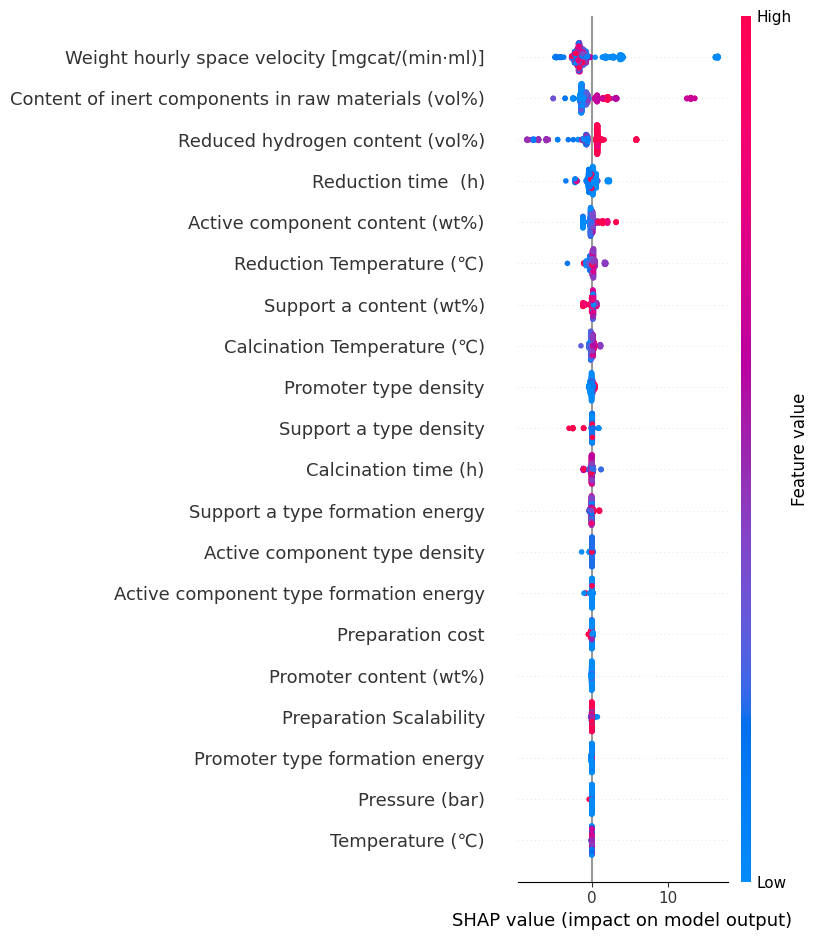

C:\Users\pcu1\Desktop\jupyter\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


C:\Users\pcu1\Desktop\jupyter\env\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\pcu1\Desktop\jupyter\env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(2221, 23))']
  warnings.warn(msg)
C:\Users\pcu1\Desktop\jupyter\env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(4442, 23))']
  warnings.warn(msg)
C:\Users\pcu1\Desktop\jupyter

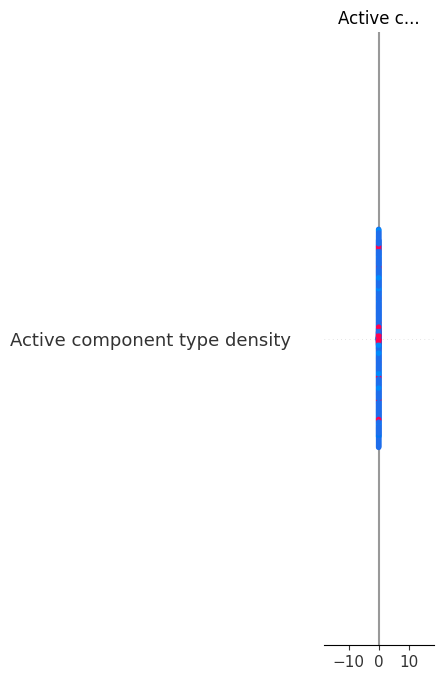

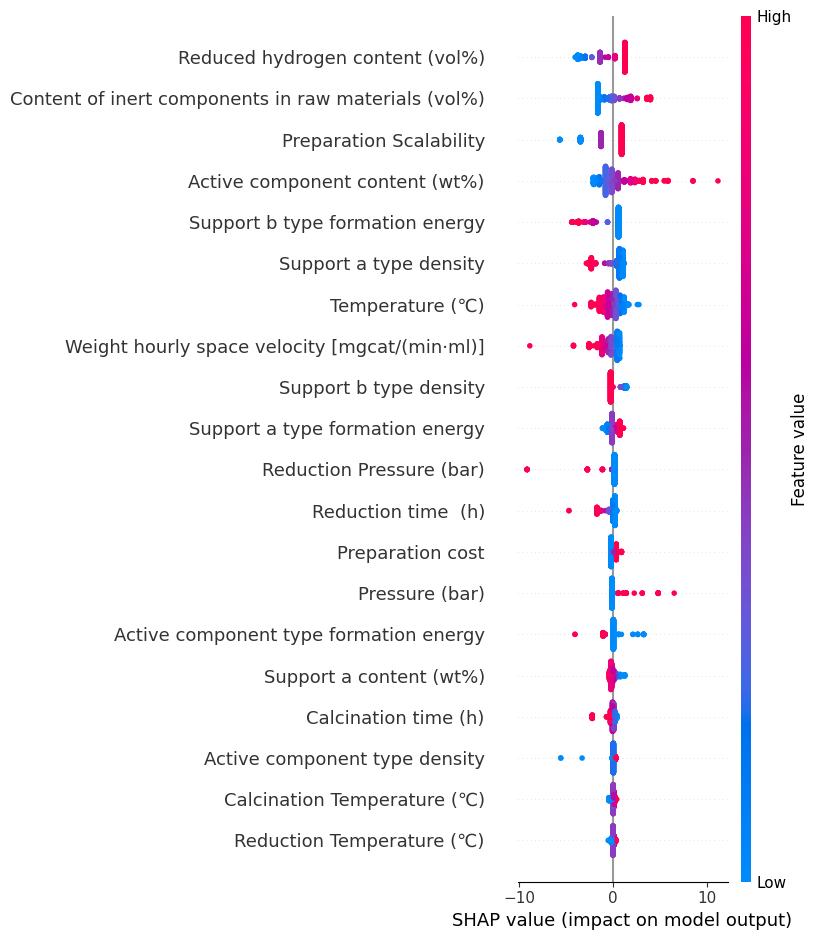

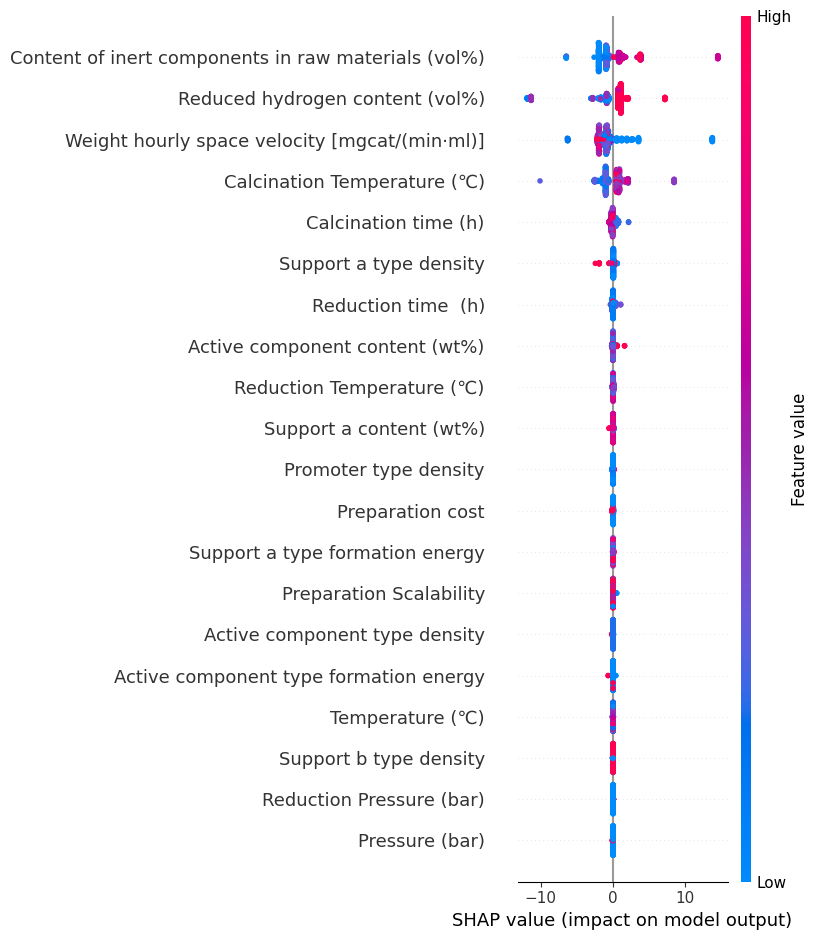

Random Forest:
  Mean Squared Error (MSE): 0.024758156057007073
  R-squared (R²): 0.9995584815853689
--------------------------------------------------
TensorFlow Neural Network:
  Mean Squared Error (MSE): 0.16482588155009759
  R-squared (R²): 0.9970606186605898
--------------------------------------------------
Linear Regression:
  Mean Squared Error (MSE): 45.3331791845282
  R-squared (R²): 0.19156203080496992
--------------------------------------------------
XGBoost:
  Mean Squared Error (MSE): 0.04397012032964849
  R-squared (R²): 0.9992158698016773
--------------------------------------------------


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



X_train, X_test, y_train, y_test = train_test_split(X, ya, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


results = {}


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)
y_pred_rf = rf_model.predict(X_test_imputed)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R²': r2_score(y_test, y_pred_rf)
}


tf_model = Sequential([
    Dense(64, input_dim=X_train_imputed.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  
])
tf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
tf_model.fit(X_train_imputed, y_train, validation_data=(X_test_imputed, y_test), epochs=400, batch_size=32, verbose=0)
loss, mae = tf_model.evaluate(X_test_imputed, y_test, verbose=0)
y_pred_tf = tf_model.predict(X_test_imputed)
results['TensorFlow Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_tf),
    'R²': r2_score(y_test, y_pred_tf)
}


lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)
y_pred_lr = lr_model.predict(X_test_imputed)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R²': r2_score(y_test, y_pred_lr)
}


mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X_train_imputed, y_train)
y_pred_mlp = mlp_model.predict(X_test_imputed)
results['Scikit-learn Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_mlp),
    'R²': r2_score(y_test, y_pred_mlp)
}


xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train_imputed, y_train)
y_pred_xgb = xgb_model.predict(X_test_imputed)
results['XGBoost'] = {
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'R²': r2_score(y_test, y_pred_xgb)
}


for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"  R-squared (R²): {metrics['R²']}")
    print("-" * 50)


C:\Users\pcu1\Desktop\jupyter\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Random Forest:
  Mean Squared Error (MSE): 0.024758156057007073
  R-squared (R²): 0.9995584815853689
--------------------------------------------------
TensorFlow Neural Network:
  Mean Squared Error (MSE): 0.1760697484233961
  R-squared (R²): 0.9968601039588975
--------------------------------------------------
Linear Regression:
  Mean Squared Error (MSE): 45.3331791845282
  R-squared (R²): 0.19156203080496992
--------------------------------------------------
Scikit-learn Neural Network:
  Mean Squared Error (MSE): 11.453727181509514
  R-squared (R²): 0.7957428067278879
--------------------------------------------------
XGBoost:
  Mean Squared Error (MSE): 0.04397012032964849
  R-squared (R²): 0.9992158698016773
--------------------------------------------------


<Axes: >

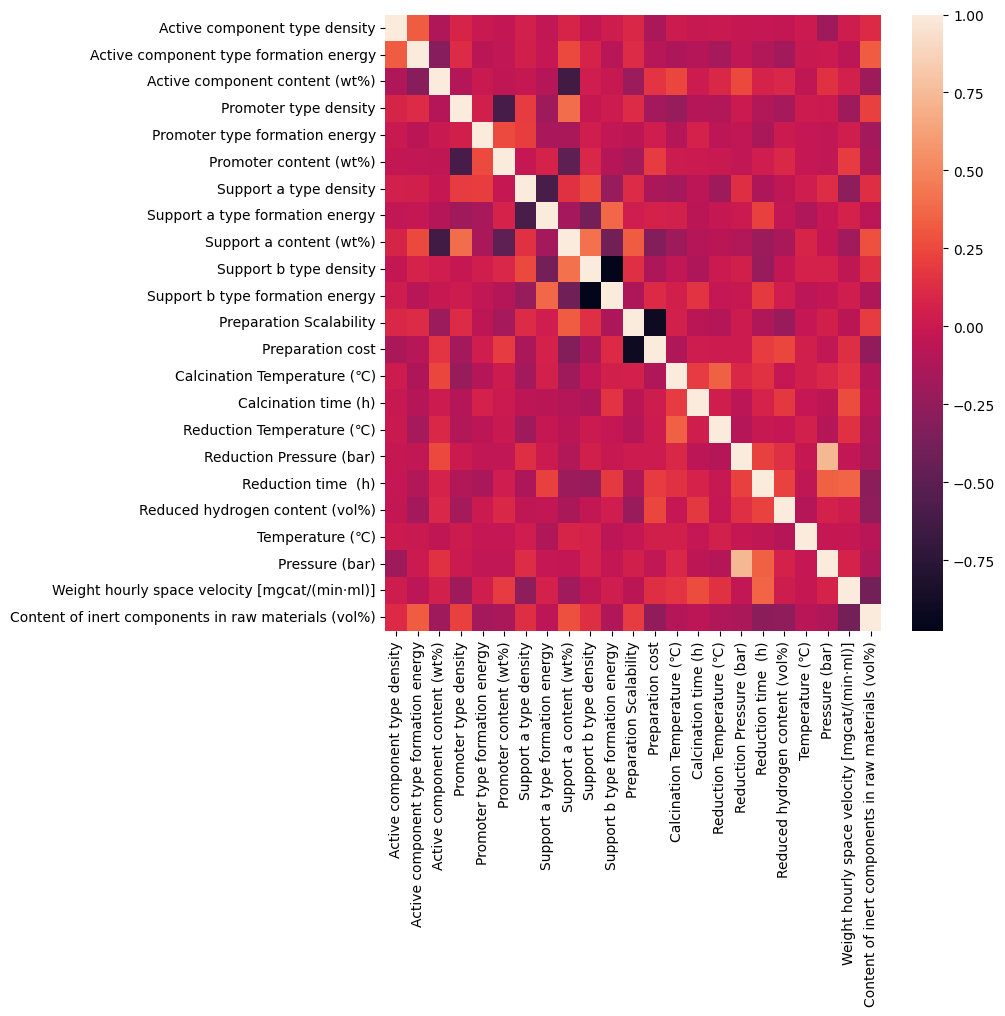

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrmat)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset


data = pd.read_excel('ml-dataset.xlsx', sheet_name="Table")


data['text'] = data.apply(lambda row: (
    f"Active component: [Density: {row['Active component type density']}, Formation Energy: {row['Active component type formation energy']}, "
    f"Content: {row['Active component content (wt%)']}], "
    f"Promoter: [Density: {row['Promoter type density']}, Formation Energy: {row['Promoter type formation energy']}, "
    f"Content: {row['Promoter content (wt%)']}], "
    f"Support: [Density A: {row['Support a type density']}, Formation Energy A: {row['Support a type formation energy']}, "
    f"Content A: {row['Support a content (wt%)']}, Density B: {row['Support b type density']}, "
    f"Formation Energy B: {row['Support b type formation energy']}], "
    f"Preparation: [Scalability: {row['Preparation Scalability']}, Cost: {row['Preparation cost']}], "
    f"Calcination: [Temperature: {row['Calcination Temperature (℃)']}, Time: {row['Calcination time (h)']}], "
    f"Reduction: [Temperature: {row['Reduction Temperature (℃)']}, Pressure: {row['Reduction Pressure (bar)']}, "
    f"Time: {row['Reduction time  (h)']}], "
    f"Process: [Temperature: {row['Temperature (℃)']}, Pressure: {row['Pressure (bar)']}], "
    f"WHSV: {row['Weight hourly space velocity [mgcat/(min·ml)]']}, "
    f"Content of inert components in raw materials: {row['Content of inert components in raw materials (vol%)']} -> "
    f"H2/CO2 ratio: {row['H2CO2 ratio (molmol)']}"  
), axis=1)


labels = ['CO2 conversion ratio(%)', 'CH4 selectivity (%)', 'CH4 yield(%)']  
X = data['text']
y = data[labels]


train_texts, eval_texts, train_labels, eval_labels = train_test_split(X, y, test_size=0.2, random_state=42)


train_data = pd.DataFrame({'text': train_texts, 'labels': train_labels.values.tolist()})
eval_data = pd.DataFrame({'text': eval_texts, 'labels': eval_labels.values.tolist()})

train_dataset = Dataset.from_pandas(train_data)
eval_dataset = Dataset.from_pandas(eval_data)


model_name = "allenai/longformer-base-4096"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(labels))



def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=1024)

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)


training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",  
    eval_steps=500,              
    learning_rate=3e-5,          
    per_device_train_batch_size=16,  
    gradient_accumulation_steps=2,  
    num_train_epochs=5,          
    warmup_steps=500,            
    weight_decay=0.01,           
    logging_dir="./logs",        
    logging_steps=100,           
    save_total_limit=2,          
    save_steps=1000,             
    fp16=False                    
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,  
    tokenizer=tokenizer,
    compute_metrics=lambda p: {
        "mse": ((p.predictions - p.label_ids) ** 2).mean()  
    },
)


trainer.train()


model.save_pretrained("bert-finetuned")
tokenizer.save_pretrained("bert-finetuned")


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

c:\Users\pcu1\Desktop\jupyter\env\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\pcu1\.cache\huggingface\hub\models--allenai--longformer-base-4096. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2221 [00:00<?, ? examples/s]

Map:   0%|          | 0/556 [00:00<?, ? examples/s]

c:\Users\pcu1\Desktop\jupyter\env\Lib\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\pcu1\AppData\Local\Temp\ipykernel_11856\722289003.py:75: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


  0%|          | 0/345 [00:00<?, ?it/s]

Initializing global attention on CLS token...


{'loss': -122.3771, 'grad_norm': 1275.923828125, 'learning_rate': 6e-06, 'epoch': 1.43}
{'loss': -561.0701, 'grad_norm': 1434.6845703125, 'learning_rate': 1.2e-05, 'epoch': 2.86}
{'loss': -859.57, 'grad_norm': 1721.9361572265625, 'learning_rate': 1.8e-05, 'epoch': 4.29}
{'train_runtime': 98542.051, 'train_samples_per_second': 0.113, 'train_steps_per_second': 0.004, 'train_loss': -585.0760954483695, 'epoch': 4.94}


('bert-finetuned\\tokenizer_config.json',
 'bert-finetuned\\special_tokens_map.json',
 'bert-finetuned\\vocab.json',
 'bert-finetuned\\merges.txt',
 'bert-finetuned\\added_tokens.json',
 'bert-finetuned\\tokenizer.json')

In [13]:
import tkinter as tk
from tkinter import messagebox
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


model_name = "bert-finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def get_prediction():
    
    active_density = entry_active_density.get()
    active_formation_energy = entry_active_formation_energy.get()
    active_content = entry_active_content.get()

    promoter_density = entry_promoter_density.get()
    promoter_formation_energy = entry_promoter_formation_energy.get()
    promoter_content = entry_promoter_content.get()

    support_a_density = entry_support_a_density.get()
    support_a_formation_energy = entry_support_a_formation_energy.get()
    support_a_content = entry_support_a_content.get()

    support_b_density = entry_support_b_density.get()
    support_b_formation_energy = entry_support_b_formation_energy.get()

    preparation_scalability = entry_preparation_scalability.get()
    preparation_cost = entry_preparation_cost.get()

    calcination_temperature = entry_calcination_temperature.get()
    calcination_time = entry_calcination_time.get()

    reduction_temperature = entry_reduction_temperature.get()
    reduction_pressure = entry_reduction_pressure.get()
    reduction_time = entry_reduction_time.get()

    process_temperature = entry_process_temperature.get()
    process_pressure = entry_process_pressure.get()

    whsv = entry_whsv.get()
    inert_content = entry_inert_content.get()
    h2co2_ratio = entry_h2co2_ratio.get()

    
    user_input = (
        f"Active component: [Density: {active_density}, Formation Energy: {active_formation_energy}, Content: {active_content}], "
        f"Promoter: [Density: {promoter_density}, Formation Energy: {promoter_formation_energy}, Content: {promoter_content}], "
        f"Support: [Density A: {support_a_density}, Formation Energy A: {support_a_formation_energy}, Content A: {support_a_content}, "
        f"Density B: {support_b_density}, Formation Energy B: {support_b_formation_energy}], "
        f"Preparation: [Scalability: {preparation_scalability}, Cost: {preparation_cost}], "
        f"Calcination: [Temperature: {calcination_temperature}, Time: {calcination_time}], "
        f"Reduction: [Temperature: {reduction_temperature}, Pressure: {reduction_pressure}, Time: {reduction_time}], "
        f"Process: [Temperature: {process_temperature}, Pressure: {process_pressure}], "
        f"WHSV: {whsv}, "
        f"Content of inert components in raw materials: {inert_content}, "
        f"H2CO2 ratio (molmol): {h2co2_ratio}"
    )

    
    inputs = tokenizer(user_input, return_tensors="pt", truncation=True, padding="max_length", max_length=1024)

    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    
    predicted_values = logits.squeeze().tolist()

    
    result_text.set(f"CO2 Conversion Ratio (%): {predicted_values[0]:.2f}\n"
                    f"CH4 Selectivity (%): {predicted_values[1]:.2f}\n"
                    f"CH4 Yield (%): {predicted_values[2]:.2f}")


root = tk.Tk()
root.title("Catalyst Performance Prediction")


root.geometry("800x700")
root.configure(bg="


form_frame = tk.Frame(root, bg='white', bd=5, padx=20, pady=20)
form_frame.place(relx=0.5, rely=0.5, anchor='center', relwidth=0.9, relheight=0.8)


labels = [
    "Active Component Density", "Active Component Formation Energy", "Active Component Content",
    "Promoter Density", "Promoter Formation Energy", "Promoter Content",
    "Support A Density", "Support A Formation Energy", "Support A Content",
    "Support B Density", "Support B Formation Energy",
    "Preparation Scalability", "Preparation Cost",
    "Calcination Temperature (℃)", "Calcination Time (hours)",
    "Reduction Temperature (℃)", "Reduction Pressure (bar)", "Reduction Time (hours)",
    "Process Temperature (℃)", "Process Pressure (bar)",
    "WHSV (mgcat/(min·ml))", "Content of Inert Components (vol%)", "H2CO2 Ratio (molmol)"
]


entries = {}


for i, label in enumerate(labels):
    tk.Label(form_frame, text=label, font=("Arial", 10), bg='white').grid(row=i, column=0, padx=10, pady=5, sticky="w")
    entry = tk.Entry(form_frame, font=("Arial", 10))
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries[label] = entry


entry_active_density = entries["Active Component Density"]
entry_active_formation_energy = entries["Active Component Formation Energy"]
entry_active_content = entries["Active Component Content"]

entry_promoter_density = entries["Promoter Density"]
entry_promoter_formation_energy = entries["Promoter Formation Energy"]
entry_promoter_content = entries["Promoter Content"]

entry_support_a_density = entries["Support A Density"]
entry_support_a_formation_energy = entries["Support A Formation Energy"]
entry_support_a_content = entries["Support A Content"]

entry_support_b_density = entries["Support B Density"]
entry_support_b_formation_energy = entries["Support B Formation Energy"]

entry_preparation_scalability = entries["Preparation Scalability"]
entry_preparation_cost = entries["Preparation Cost"]

entry_calcination_temperature = entries["Calcination Temperature (℃)"]
entry_calcination_time = entries["Calcination Time (hours)"]

entry_reduction_temperature = entries["Reduction Temperature (℃)"]
entry_reduction_pressure = entries["Reduction Pressure (bar)"]
entry_reduction_time = entries["Reduction Time (hours)"]

entry_process_temperature = entries["Process Temperature (℃)"]
entry_process_pressure = entries["Process Pressure (bar)"]

entry_whsv = entries["WHSV (mgcat/(min·ml))"]
entry_inert_content = entries["Content of Inert Components (vol%)"]
entry_h2co2_ratio = entries["H2CO2 Ratio (molmol)"]


tk.Button(root, text="Predict", font=("Arial", 12), bg="


result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text, font=("Arial", 12), bg="
result_label.pack(pady=10)


root.mainloop()


In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd


model_name = "bert-finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def test_model_from_csv(csv_file):
    
    data = pd.read_csv(csv_file)

    
    if "text" not in data.columns:
        raise ValueError("The CSV file must have a 'text' column containing the input text.")

    
    for index, row in data.iterrows():
        user_input = row["text"]

        
        inputs = tokenizer(user_input, return_tensors="pt", truncation=True, padding="max_length", max_length=512)

        
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits

        
        print(f"Logits shape for Row {index + 1}: {logits.shape}")

        
        if len(logits.shape) == 2:
            predicted_values = logits.squeeze().tolist()
            
            print(f"Predicted values (logits length): {len(predicted_values)}")

            
            if len(predicted_values) > 3:
                print(f"Row {index + 1}:")
                print(f"Input Text: {user_input}")
                print(f"Predicted values:")
                print(f"  CO2 conversion ratio: {predicted_values[1]:.2f}")
                print(f"  CH4 selectivity: {predicted_values[2]:.2f}")
                print(f"  CH4 yield: {predicted_values[3]:.2f}")
            else:
                print(f"Row {index + 1}: Model output is not in the expected format.")
                print(f"  Expected at least 4 values, but got {len(predicted_values)} values.")
            print("-" * 40)
        else:
            print(f"Row {index + 1}: Unexpected output shape.")
            print(f"  Logits shape: {logits.shape}")


csv_file_path = "input_data.csv"  
test_model_from_csv(csv_file_path)


Logits shape for Row 1: torch.Size([1, 3])
Predicted values (logits length): 3
Row 1: Model output is not in the expected format.
  Expected at least 4 values, but got 3 values.
----------------------------------------
Logits shape for Row 2: torch.Size([1, 3])
Predicted values (logits length): 3
Row 2: Model output is not in the expected format.
  Expected at least 4 values, but got 3 values.
----------------------------------------
Logits shape for Row 3: torch.Size([1, 3])
Predicted values (logits length): 3
Row 3: Model output is not in the expected format.
  Expected at least 4 values, but got 3 values.
----------------------------------------
Logits shape for Row 4: torch.Size([1, 3])
Predicted values (logits length): 3
Row 4: Model output is not in the expected format.
  Expected at least 4 values, but got 3 values.
----------------------------------------
Logits shape for Row 5: torch.Size([1, 3])
Predicted values (logits length): 3
Row 5: Model output is not in the expected fo

In [15]:
import pandas as pd


data = [
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 4, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 200, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 250, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 300, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 350, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 400, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 450, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 500, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Co", "Active component type formation energy": 0.025, "Active component type density": 9.2, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 200, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Co", "Active component type formation energy": 0.025, "Active component type density": 9.2, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 250, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Co", "Active component type formation energy": 0.025, "Active component type density": 9.2, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 300, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Co", "Active component type formation energy": 0.025, "Active component type density": 9.2, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 350, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Co", "Active component type formation energy": 0.025, "Active component type density": 9.2, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 400, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Co", "Active component type formation energy": 0.025, "Active component type density": 9.2, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O2", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 450, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Co", "Active component type formation energy": 0.025, "Active component type density": 9.2, "Active component content (wt%)": 10, "Promoter type": "None", "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 500, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 5, "Promoter type": "Co", "Promoter type formation energy": 0.025, "Promoter type density": 9.2, "Promoter content (wt%)": 5, "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 200, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 5, "Promoter type": "Co", "Promoter type formation energy": 0.025, "Promoter type density": 9.2, "Promoter content (wt%)": 5, "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 250, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 5, "Promoter type": "Co", "Promoter type formation energy": 0.025, "Promoter type density": 9.2, "Promoter content (wt%)": 5, "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 300, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
    {"Active component type": "Ni", "Active component type formation energy": 0.046, "Active component type density": 9.22, "Active component content (wt%)": 5, "Promoter type": "Co", "Promoter type formation energy": 0.025, "Promoter type density": 9.2, "Promoter content (wt%)": 5, "Support a type": "Al2O3", "Calcination Temperature (℃)": 500, "Reduction Temperature (℃)": 500, "Temperature (℃)": 350, "Pressure (bar)": 1, "H2CO2 ratio (molmol)": 4},
]


df = pd.DataFrame(data)


queries = []
for _, row in df.iterrows():
    query = (
        f"A {row['Active component type']}-based catalyst with a formation energy of {row['Active component type formation energy']} eV "
        f"and a density of {row['Active component type density']} g/cm³ is used at {row['Active component content (wt%)']} wt% loading. "
        f"The support is {row['Support a type']}. "
        f"The calcination temperature is {row['Calcination Temperature (℃)']}°C, and the reduction temperature is {row['Reduction Temperature (℃)']}°C. "
        f"The reaction conditions include a temperature of {row['Temperature (℃)']}°C, a pressure of {row['Pressure (bar)']} bar, "
        f"and a H₂/CO₂ ratio of {row['H2CO2 ratio (molmol)']} mol/mol."
    )
    queries.append(query)


df['Generated Query'] = queries


df.to_csv('catalyst_data_with_queries.csv', index=False)

print("Data saved to 'catalyst_data_with_queries.csv'")

Data saved to 'catalyst_data_with_queries.csv'


In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score


model_path = "bert-finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)


model.eval()



from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


texts = [
    "Active component: [Density: 1.0, Formation Energy: -2.0, Content: 5.0], "
    "Promoter: [Density: 1.1, Formation Energy: -3.1, Content: 3.5], "
    "Support: [Density A: 0.9, Formation Energy A: -1.5, Content A: 4.5, Density B: 1.2, "
    "Formation Energy B: -2.5], Preparation: [Scalability: 5, Cost: 2], "
    "Calcination: [Temperature: 500, Time: 2], Reduction: [Temperature: 600, Pressure: 10, Time: 1], "
    "Process: [Temperature: 700, Pressure: 20], WHSV: 15.0, Content of inert components in raw materials: 10.0 -> "
    "H2/CO2 ratio: 3.0",

    "Active component: [Density: 1.5, Formation Energy: -1.8, Content: 7.0], "
    "Promoter: [Density: 1.2, Formation Energy: -2.8, Content: 4.0], "
    "Support: [Density A: 1.1, Formation Energy A: -1.0, Content A: 5.0, Density B: 1.3, "
    "Formation Energy B: -2.0], Preparation: [Scalability: 2, Cost: 3], "
    "Calcination: [Temperature: 550, Time: 3], Reduction: [Temperature: 650, Pressure: 12, Time: 2], "
    "Process: [Temperature: 750, Pressure: 25], WHSV: 20.0, Content of inert components in raw materials: 12.0 -> "
    "H2/CO2 ratio: 3.5"
]


inputs = tokenizer(texts, padding=True, truncation=True, max_length=1024, return_tensors="pt")


model.eval()  
with torch.no_grad():
    outputs = model(**inputs)
    predictions = outputs.logits.numpy()  


true_labels = [
    [80, 90, 72],  
    [75, 85, 68]   
]


mse = mean_squared_error(true_labels, predictions)
print(f"Mean Squared Error (MSE): {mse}")


r2 = r2_score(true_labels, predictions)
print(f"R² (Coefficient of Determination): {r2}")

Mean Squared Error (MSE): 4799.859654472218
R² (Coefficient of Determination): -884.6487426757812


In [3]:
import tkinter as tk
from tkinter import messagebox, filedialog
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score


model_name = "bert-finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


def get_prediction():
    
    active_density = entry_active_density.get()
    active_formation_energy = entry_active_formation_energy.get()
    active_content = entry_active_content.get()

    promoter_density = entry_promoter_density.get()
    promoter_formation_energy = entry_promoter_formation_energy.get()
    promoter_content = entry_promoter_content.get()

    support_a_density = entry_support_a_density.get()
    support_a_formation_energy = entry_support_a_formation_energy.get()
    support_a_content = entry_support_a_content.get()

    support_b_density = entry_support_b_density.get()
    support_b_formation_energy = entry_support_b_formation_energy.get()

    preparation_scalability = entry_preparation_scalability.get()
    preparation_cost = entry_preparation_cost.get()

    calcination_temperature = entry_calcination_temperature.get()
    calcination_time = entry_calcination_time.get()

    reduction_temperature = entry_reduction_temperature.get()
    reduction_pressure = entry_reduction_pressure.get()
    reduction_time = entry_reduction_time.get()

    process_temperature = entry_process_temperature.get()
    process_pressure = entry_process_pressure.get()

    whsv = entry_whsv.get()
    inert_content = entry_inert_content.get()
    h2co2_ratio = entry_h2co2_ratio.get()

    
    user_input = (
        f"Active component: [Density: {active_density}, Formation Energy: {active_formation_energy}, Content: {active_content}], "
        f"Promoter: [Density: {promoter_density}, Formation Energy: {promoter_formation_energy}, Content: {promoter_content}], "
        f"Support: [Density A: {support_a_density}, Formation Energy A: {support_a_formation_energy}, Content A: {support_a_content}, "
        f"Density B: {support_b_density}, Formation Energy B: {support_b_formation_energy}], "
        f"Preparation: [Scalability: {preparation_scalability}, Cost: {preparation_cost}], "
        f"Calcination: [Temperature: {calcination_temperature}, Time: {calcination_time}], "
        f"Reduction: [Temperature: {reduction_temperature}, Pressure: {reduction_pressure}, Time: {reduction_time}], "
        f"Process: [Temperature: {process_temperature}, Pressure: {process_pressure}], "
        f"WHSV: {whsv}, "
        f"Content of inert components in raw materials: {inert_content}, "
        f"H2CO2 ratio (molmol): {h2co2_ratio}"
    )

    
    inputs = tokenizer(user_input, return_tensors="pt", truncation=True, padding="max_length", max_length=1024)

    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    
    predicted_values = logits.squeeze().tolist()

    
    result_text.set(f"CO2 Conversion Ratio (%): {predicted_values[0]:.2f}\n"
                    f"CH4 Selectivity (%): {predicted_values[1]:.2f}\n"
                    f"CH4 Yield (%): {predicted_values[2]:.2f}")


def process_csv():
    
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if file_path:
        try:
            
            df = pd.read_csv(file_path)

            
            predictions = []

            
            for _, row in df.iterrows():
                
                user_input = (
                    f"Active component: [Density: {row['Active Component Density']}, Formation Energy: {row['Active Component Formation Energy']}, Content: {row['Active Component Content']}], "
                    f"Promoter: [Density: {row['Promoter Density']}, Formation Energy: {row['Promoter Formation Energy']}, Content: {row['Promoter Content']}], "
                    f"Support: [Density A: {row['Support A Density']}, Formation Energy A: {row['Support A Formation Energy']}, Content A: {row['Support A Content']}, "
                    f"Density B: {row['Support B Density']}, Formation Energy B: {row['Support B Formation Energy']}], "
                    f"Preparation: [Scalability: {row['Preparation Scalability']}, Cost: {row['Preparation Cost']}], "
                    f"Calcination: [Temperature: {row['Calcination Temperature (℃)']}, Time: {row['Calcination Time (hours)']}], "
                    f"Reduction: [Temperature: {row['Reduction Temperature (℃)']}, Pressure: {row['Reduction Pressure (bar)']}, Time: {row['Reduction Time (hours)']}], "
                    f"Process: [Temperature: {row['Process Temperature (℃)']}, Pressure: {row['Process Pressure (bar)']}], "
                    f"WHSV: {row['WHSV (mgcat/(min·ml))']}, "
                    f"Content of inert components in raw materials: {row['Content of Inert Components (vol%)']}, "
                    f"H2CO2 ratio (molmol): {row['H2CO2 Ratio (molmol)']}"
                )

                
                inputs = tokenizer(user_input, return_tensors="pt", truncation=True, padding="max_length", max_length=1024)
                with torch.no_grad():
                    outputs = model(**inputs)
                    logits = outputs.logits

                
                predictions.append(logits.squeeze().tolist())

            
            prediction_df = pd.DataFrame(predictions, columns=["CO2 Conversion Ratio", "CH4 Selectivity", "CH4 Yield"])
            df_with_predictions = pd.concat([df, prediction_df], axis=1)
            
            
            output_file_path = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV Files", "*.csv")])
            if output_file_path:
                df_with_predictions.to_csv(output_file_path, index=False)
                
                
                if "CO2 Conversion Ratio Actual" in df.columns and "CH4 Selectivity Actual" in df.columns and "CH4 Yield Actual" in df.columns:
                    y_true = df[["CO2 Conversion Ratio Actual", "CH4 Selectivity Actual", "CH4 Yield Actual"]].values
                    y_pred = prediction_df.values
                    mse = mean_squared_error(y_true, y_pred)
                    r2 = r2_score(y_true, y_pred)
                    messagebox.showinfo("Metrics", f"Mean Squared Error: {mse:.4f}\nR²: {r2:.4f}")
                else:
                    messagebox.showinfo("Metrics", "No actual values for MSE and R² calculation.")

        except Exception as e:
            messagebox.showerror("Error", f"An error occurred while processing the CSV: {e}")


root = tk.Tk()
root.title("Catalyst Performance Prediction")


root.geometry("900x900")
root.configure(bg="


canvas = tk.Canvas(root)
scrollbar = tk.Scrollbar(root, orient="vertical", command=canvas.yview)
scrollable_frame = tk.Frame(canvas)


canvas.configure(yscrollcommand=scrollbar.set)


scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")


canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")


labels = [
    "Active Component Density", "Active Component Formation Energy", "Active Component Content",
    "Promoter Density", "Promoter Formation Energy", "Promoter Content",
    "Support A Density", "Support A Formation Energy", "Support A Content",
    "Support B Density", "Support B Formation Energy",
    "Preparation Scalability", "Preparation Cost",
    "Calcination Temperature (℃)", "Calcination Time (hours)",
    "Reduction Temperature (℃)", "Reduction Pressure (bar)", "Reduction Time (hours)",
    "Process Temperature (℃)", "Process Pressure (bar)",
    "WHSV (mgcat/(min·ml))", "Content of Inert Components (vol%)", "H2CO2 Ratio (molmol)"
]


entries = []
for i, label in enumerate(labels):
    label_widget = tk.Label(scrollable_frame, text=label, font=("Helvetica", 10), bg='
    label_widget.grid(row=i, column=0, sticky='w', padx=10, pady=5)

    entry = tk.Entry(scrollable_frame, bg='
    entry.grid(row=i, column=1, padx=10, pady=5, sticky='w')
    entries.append(entry)


(entry_active_density, entry_active_formation_energy, entry_active_content, entry_promoter_density,
 entry_promoter_formation_energy, entry_promoter_content, entry_support_a_density,
 entry_support_a_formation_energy, entry_support_a_content, entry_support_b_density,
 entry_support_b_formation_energy, entry_preparation_scalability, entry_preparation_cost,
 entry_calcination_temperature, entry_calcination_time, entry_reduction_temperature, entry_reduction_pressure,
 entry_reduction_time, entry_process_temperature, entry_process_pressure,
 entry_whsv, entry_inert_content, entry_h2co2_ratio) = entries


result_text = tk.StringVar()
result_label = tk.Label(scrollable_frame, textvariable=result_text, bg='white', font=("Helvetica", 12))
result_label.grid(row=len(labels), column=0, columnspan=2, pady=20)


button_frame = tk.Frame(root, bg='
button_frame.pack(side='bottom', fill='x', padx=20, pady=20)


predict_button = tk.Button(button_frame, text="Get Prediction", bg='
predict_button.pack(side='left', padx=20)

process_csv_button = tk.Button(button_frame, text="Process CSV", bg='
process_csv_button.pack(side='right', padx=20)

root.mainloop()
